# Tensorflow Keras functional API

In [2]:
from utilities.std_imports import *
import tensorflow.keras as tk

### Load data

In [3]:
(X_train_full, y_train_full), (x_test, y_test) = tk.datasets.mnist.load_data()
X_test, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_test, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)


### Sequential model

In [10]:
inp = tk.layers.Flatten(input_shape=[28, 28])
hid1 = tk.layers.Dense(256, activation="relu")
hid2 = tk.layers.Dense(128, activation="relu")
out = tk.layers.Dense(10, activation="softmax")

model = tk.models.Sequential([inp, hid1, hid2, out])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


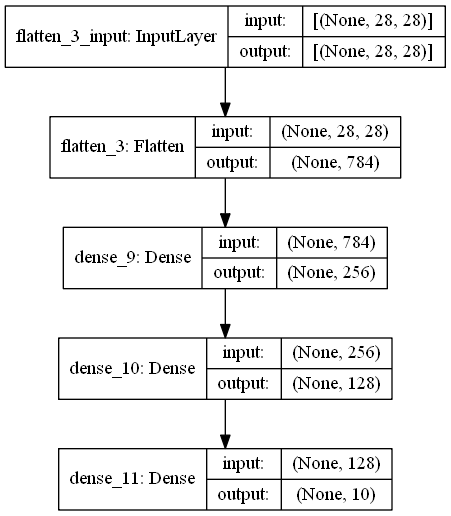

In [11]:
model.summary()
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
res = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0521 - accuracy: 0.7122 - val_loss: 0.3072 - val_accuracy: 0.9156
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.9127 - val_loss: 0.2368 - val_accuracy: 0.9348
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2437 - accuracy: 0.9300 - val_loss: 0.2025 - val_accuracy: 0.9426
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2060 - accuracy: 0.9411 - val_loss: 0.1751 - val_accuracy: 0.9526
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1813 - accuracy: 0.9481 - val_loss: 0.1564 - val_accuracy: 0.9556
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1586 - accuracy: 0.9544 - val_loss: 0.1424 - val_accuracy: 0.9608
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1414 - accuracy: 0.9593 - val_loss: 0.1360 - val_accuracy:

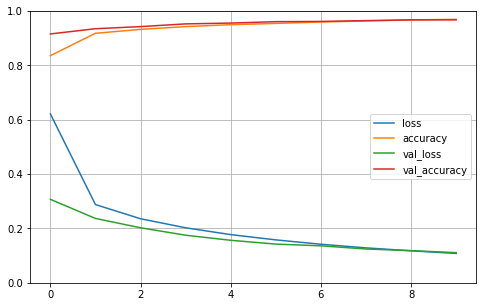

In [13]:
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

### Functional model

In [14]:
inp = tk.layers.Input(shape=[28, 28])
flat1 = tk.layers.Flatten(input_shape=[28, 28])(inp)
hid1 = tk.layers.Dense(2**14, activation="relu")(flat1)
hid2 = tk.layers.Dense(512, activation='relu')(hid1)
hid3 = tk.layers.Dense(28*28, activation='relu')(hid2)
resh = tk.layers.Reshape((28, 28))(hid3)
conc = tk.layers.Concatenate()([inp, resh])
flat2 = tk.layers.Flatten(input_shape=[28, 28])(conc)
out  = tk.layers.Dense(10, activation='softmax')(flat2)

model = tk.Model(inputs=[inp], outputs=[out] )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16384)        12861440    flatten_4[0][0]                  
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 512)          8389120     dense_12[0][0]                   
______________________________________________________________________________________________

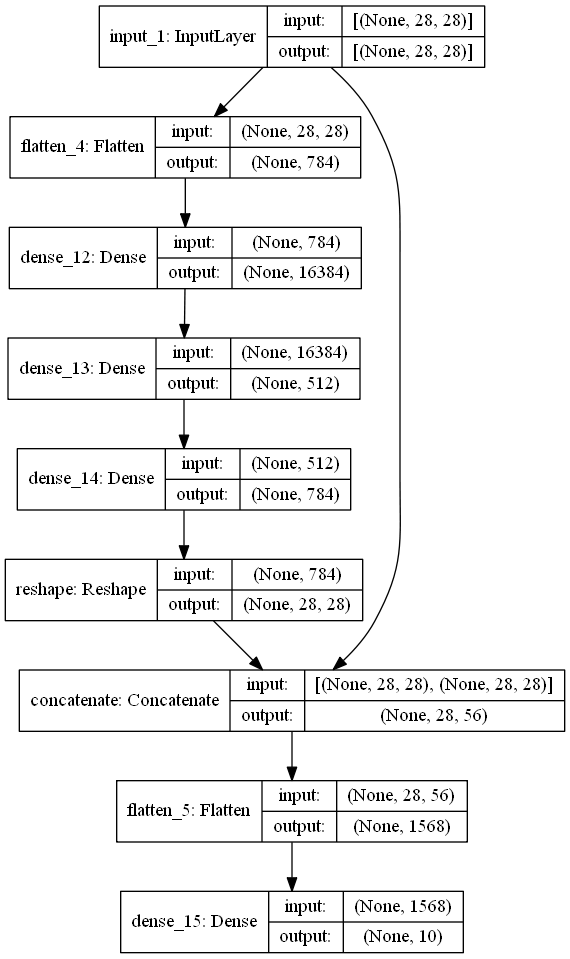

In [15]:
model.summary()
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
res = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1719/1719 [==============================] - 84s 49ms/step - loss: 0.9488 - accuracy: 0.7658 - val_loss: 0.2911 - val_accuracy: 0.9192
Epoch 2/10
1719/1719 [==============================] - 85s 49ms/step - loss: 0.2863 - accuracy: 0.9186 - val_loss: 0.2164 - val_accuracy: 0.9382
Epoch 3/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.2165 - accuracy: 0.9372 - val_loss: 0.1740 - val_accuracy: 0.9514
Epoch 4/10
1719/1719 [==============================] - 83s 48ms/step - loss: 0.1720 - accuracy: 0.9503 - val_loss: 0.1507 - val_accuracy: 0.9594
Epoch 5/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.1407 - accuracy: 0.9608 - val_loss: 0.1239 - val_accuracy: 0.9662
Epoch 6/10
1719/1719 [==============================] - 83s 48ms/step - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.1163 - val_accuracy: 0.9694
Epoch 7/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.0975 - accuracy: 0.9727 - val_loss: 0.1142 -

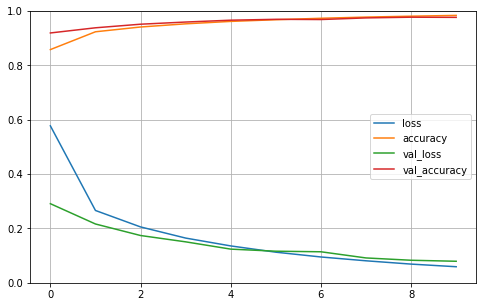

In [17]:
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Credits & Links

https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e